<h2> Task 15. Implement basic Gradient Descent </h2>
The goal of this task is to implement the Basic Gradient Descent algorithm to optimize a given objective function.



1.   Select an Objective Function, I would recommend quadratic because this is often used in examples. f(x)=ax^2 + bx + c. Feel free to try complex ones used in tasks above

2.   Define a function to compute the gradient of the objective function. We will assume we do not know how to compute the gradient, therefore we have to estimate it. Implement numerical gradient estimation
3.   Update Rule: Implement the update rule for the gradient descent based on learning rate


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_objective_function(x):
    return (x - 3) ** 2 + 1

def numerical_gradient(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def gradient_descent(starting_point, learning_rate, num_iterations, h=1e-5):
    x = starting_point
    x_history = []
    f_history = []

    for _ in range(num_iterations):
        x_history.append(x)
        f_history.append(quadratic_objective_function(x))

        grad = numerical_gradient(quadratic_objective_function, x, h)
        x = x - learning_rate * grad  

    return x, f_history, x_history

final_x, f_hist, x_hist = gradient_descent(5, 0.1, 20)
print(f"Final x: {final_x:.6f}")
print(f"Final f(x): {quadratic_objective_function(final_x):.6f}")


Final x: 3.023058
Final f(x): 1.000532


<h2> Task 16. Experiment basic Gradient Descent </h2>
To compare the effect of varying the step size h used in the numerical gradient estimation and the learning rate in the Gradient Descent algorithm, we will set up an experiment using both the exact gradient of a quadratic function and the numerically estimated gradient. We will analyze how changes in ℎ and the learning rate (lr) affect convergence.



1.   Experiment with lr,h and exact derivative vs numerical estimate
2.   Record and visualize results
3.   Use f_history and x_history to visualize path during the optimization
4.   Draw conclusions and support them with figures from (3.). How is h and lr affecting convergance? Exact derivative vs numerical estimate?


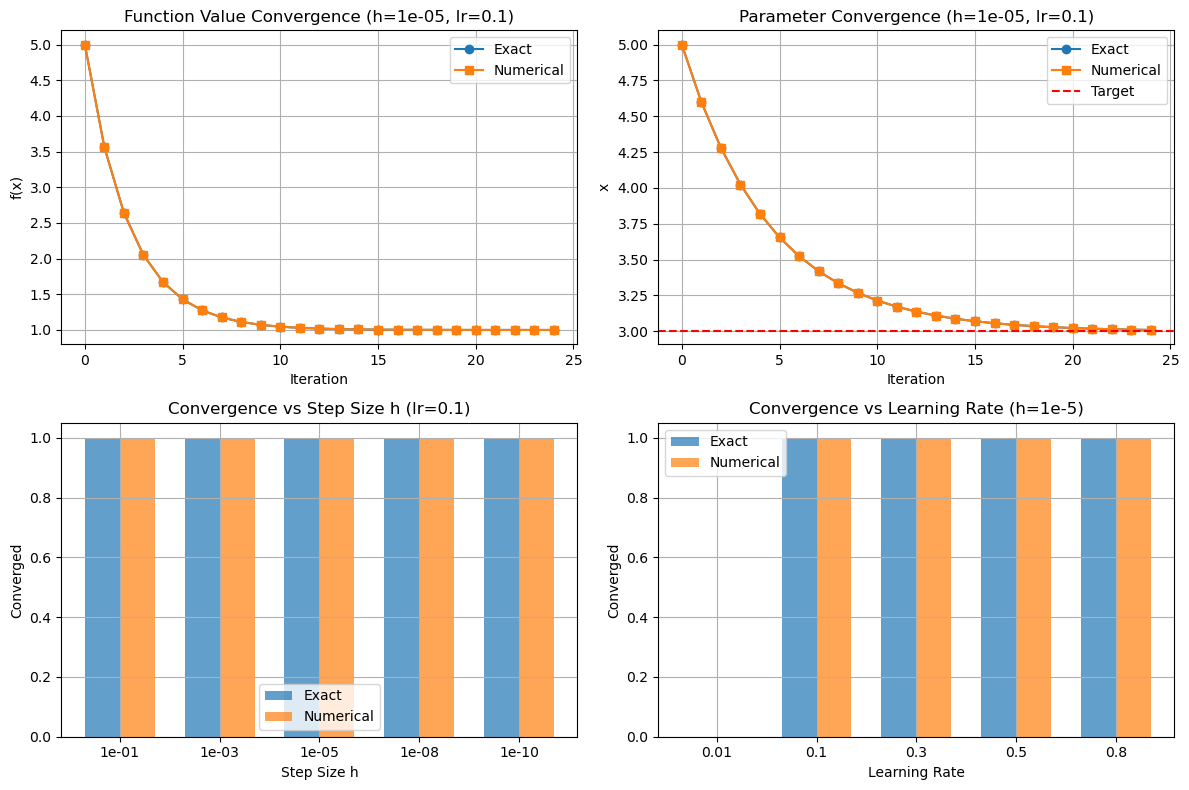

Summary Results:
h=1e-05, lr=0.1: Exact=3.007556, Numerical=3.007556
h=1e-10, lr=0.1: Exact=3.007556, Numerical=3.007556
h=1e-05, lr=0.5: Exact=3.000000, Numerical=3.000000
h=1e-10, lr=0.5: Exact=3.000000, Numerical=3.000000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def the_exact_derivative(x):
    return 2 * (x - 3)

def gradient_descent_exact(starting_point, learning_rate, num_iterations):
    x = starting_point
    x_history = []
    f_history = []

    for _ in range(num_iterations):
        x_history.append(x)
        f_history.append(quadratic_objective_function(x))

        grad = the_exact_derivative(x)
        x = x - learning_rate * grad

    return x, f_history, x_history

starting_point = 5
h_values = [1e-1, 1e-3, 1e-5, 1e-8, 1e-10]
learning_rates = [0.01, 0.1, 0.3, 0.5, 0.8]
num_iterations = 25

results = {}

for h in h_values:
    for lr in learning_rates:
        
        final_x_exact, f_hist_exact, x_hist_exact = gradient_descent_exact(starting_point, lr, num_iterations)
        
        final_x_numerical, f_hist_numerical, x_hist_numerical = gradient_descent(starting_point, lr, num_iterations, h)

        results[(h, lr)] = {
            'exact': {
                'final_x': final_x_exact,
                'final_f': quadratic_objective_function(final_x_exact),
                'converged': abs(final_x_exact - 3) < 0.01,
                'f_history': f_hist_exact,
                'x_history': x_hist_exact
            },
            'numerical': {
                'final_x': final_x_numerical,
                'final_f': quadratic_objective_function(final_x_numerical),
                'converged': abs(final_x_numerical - 3) < 0.01,
                'f_history': f_hist_numerical,
                'x_history': x_hist_numerical
            }
        }

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Test case parameters
h_test = 1e-5
lr_test = 0.1
test_result = results[(h_test, lr_test)]

# Plot 1: Function value convergence
axes[0,0].plot(test_result['exact']['f_history'], label='Exact', marker='o')
axes[0,0].plot(test_result['numerical']['f_history'], label='Numerical', marker='s')
axes[0,0].set_title(f'Function Value Convergence (h={h_test}, lr={lr_test})')
axes[0,0].set_xlabel('Iteration')
axes[0,0].set_ylabel('f(x)')
axes[0,0].legend()
axes[0,0].grid(True)

# Plot 2: Parameter convergence
axes[0,1].plot(test_result['exact']['x_history'], label='Exact', marker='o')
axes[0,1].plot(test_result['numerical']['x_history'], label='Numerical', marker='s')
axes[0,1].axhline(y=3, color='red', linestyle='--', label='Target')
axes[0,1].set_title(f'Parameter Convergence (h={h_test}, lr={lr_test})')
axes[0,1].set_xlabel('Iteration')
axes[0,1].set_ylabel('x')
axes[0,1].legend()
axes[0,1].grid(True)

# Plot 3: Effect of h on convergence
convergence_exact = [results[(h, 0.1)]['exact']['converged'] for h in h_values]
convergence_numerical = [results[(h, 0.1)]['numerical']['converged'] for h in h_values]
x_pos = np.arange(len(h_values))
width = 0.35

axes[1,0].bar(x_pos - width/2, convergence_exact, width, alpha=0.7, label='Exact')
axes[1,0].bar(x_pos + width/2, convergence_numerical, width, alpha=0.7, label='Numerical')
axes[1,0].set_title('Convergence vs Step Size h (lr=0.1)')
axes[1,0].set_xlabel('Step Size h')
axes[1,0].set_ylabel('Converged')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels([f'{h:.0e}' for h in h_values])
axes[1,0].legend()
axes[1,0].grid(True)

# Plot 4: Effect of learning rate on convergence
convergence_lr_exact = [results[(1e-5, lr)]['exact']['converged'] for lr in learning_rates]
convergence_lr_numerical = [results[(1e-5, lr)]['numerical']['converged'] for lr in learning_rates]
x_pos_lr = np.arange(len(learning_rates))

axes[1,1].bar(x_pos_lr - width/2, convergence_lr_exact, width, alpha=0.7, label='Exact')
axes[1,1].bar(x_pos_lr + width/2, convergence_lr_numerical, width, alpha=0.7, label='Numerical')
axes[1,1].set_title('Convergence vs Learning Rate (h=1e-5)')
axes[1,1].set_xlabel('Learning Rate')
axes[1,1].set_ylabel('Converged')
axes[1,1].set_xticks(x_pos_lr)
axes[1,1].set_xticklabels([str(lr) for lr in learning_rates])
axes[1,1].legend()
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

print("Summary Results:")
print("=" * 50)
for lr in [0.1, 0.5]:
    for h in [1e-5, 1e-10]:
        exact_final = results[(h, lr)]['exact']['final_x']
        numerical_final = results[(h, lr)]['numerical']['final_x']
        print(f"h={h}, lr={lr}: Exact={exact_final:.6f}, Numerical={numerical_final:.6f}")

## Conclusions

The step size h affects numerical gradient accuracy - smaller h values give better approximation until numerical precision errors occur (around 1e-10). Learning rate controls convergence speed: higher lr converges faster but can overshoot, while lower lr is stable but slow. When h is properly chosen, exact and numerical methods give nearly identical results, showing that numerical gradients are reliable for optimization.